In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 16.6 MB/s eta 0:00:00


### Задание 1 - по тетрадке sem01_autograd.

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градиенты с тем, как считает PyTorch AutoGrad.

In [ ]:
import numpy as np
import torch

In [ ]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

In [ ]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    #TODO

    # Compute and print loss

    # Backward pass:


    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    if t % 100 == 99:
        print(f'Loss on iteration {t} = {loss}')


### Задание 2.

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv',index_col=0)

In [ ]:
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

In [ ]:
df.describe()

x1            x2             y
count  10000.000000  10000.000000  10000.000000
mean      -0.029488     -0.098799      0.509700
std        4.981907      5.022414      0.499931
min       -9.988732     -9.972095      0.000000
25%       -4.062951     -4.170403      0.000000
50%       -0.063085     -0.097836      1.000000
75%        4.016095      3.880448      1.000000
max        9.985560      9.982304      1.000000

Как и в любой задаче машинного обучения, для начала надо визуализировать данные.
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

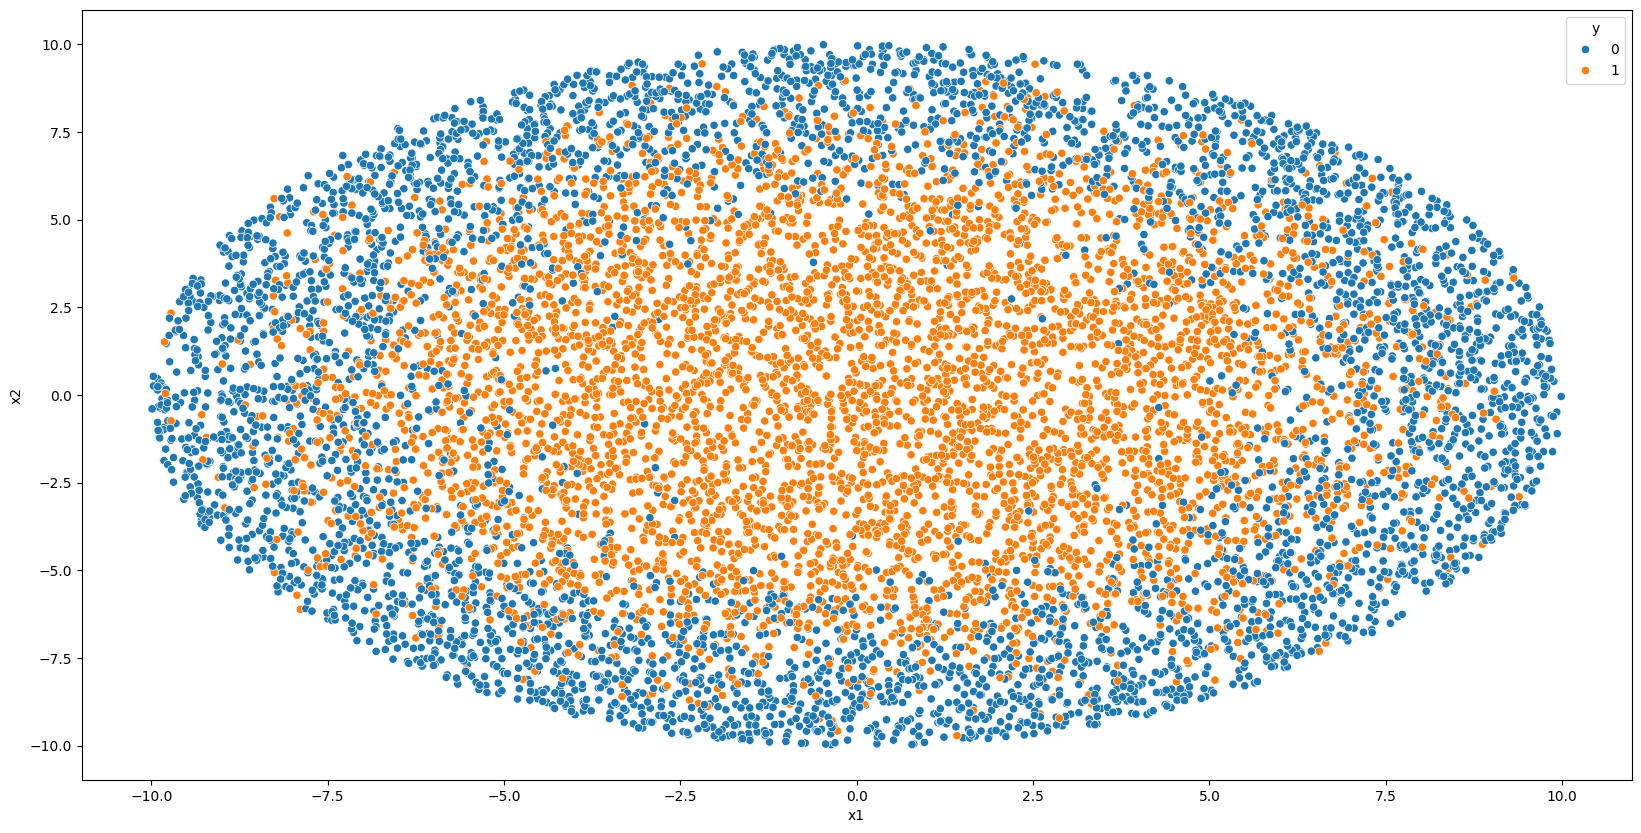

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

**1) Можем ли мы построить идеальную модель?**

Судя по визуализации, классы имеют почти четкую границу между собой. Без перекрытий, конечно, не обошлось, но мы можем выделить границы классов, посомтрев на визуализацию.

Для идеальной модели точность может быть высокой, однако это возможно только при условии отсутствия шума и выбросов в данных. Здесь же есть перекрытие классов, идеальная модель может оказаться недостижимой.




**2) Что ещё мы хотим знать о выборке?**

Среднее, стандартное отклонение, диапазон значений по каждому признаку, баланс классов, корреляция признаков, наличие выбросов


**3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?**

Логистическая регрессия (подходит, так как данные линейно разделимы).

Методы опорных векторов:
SVM с линейным ядром отлично справится с задачей.

Деревья решений:
Деревья решений можно использовать, но они могут быть избыточны для таких данных.

Нейронные сети:
Нейронная сеть с несколькими слоями может решить задачу, но будет более сложной в настройке и обучении.

K-ближайших соседей:
KNN также может быть эффективным для разделимых данных.

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

Точность нашей модели 0.583939393939394


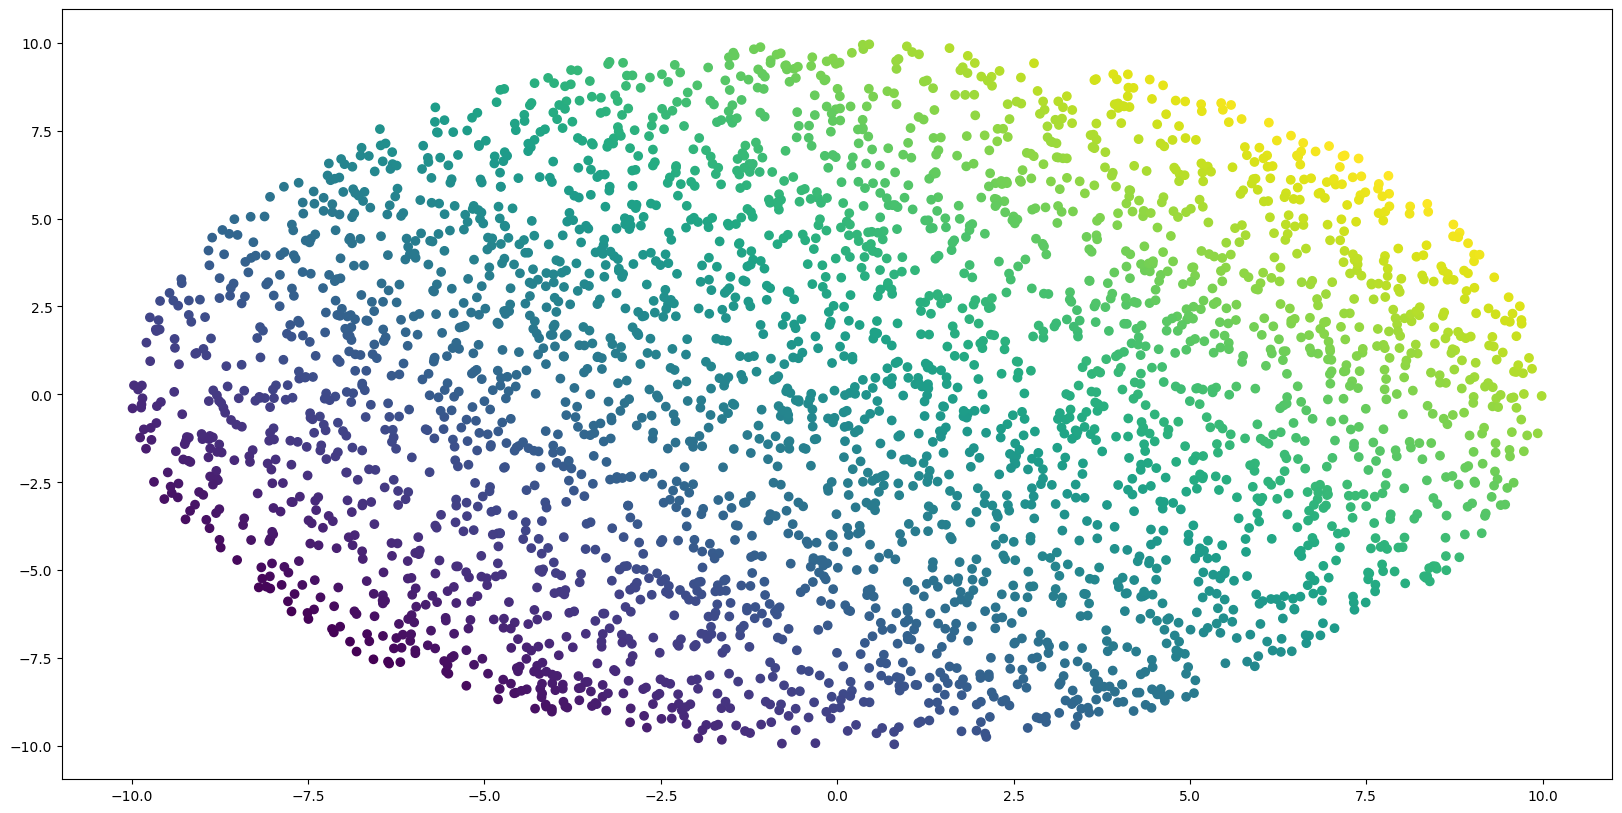

In [ ]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

predict_logit = logit_model.predict(X_test)
predict_log_proba = logit_model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_log_proba)
plt.show()

Нельзя сказать, что точность высокая. Классы выстроились градиентом.

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8503030303030303


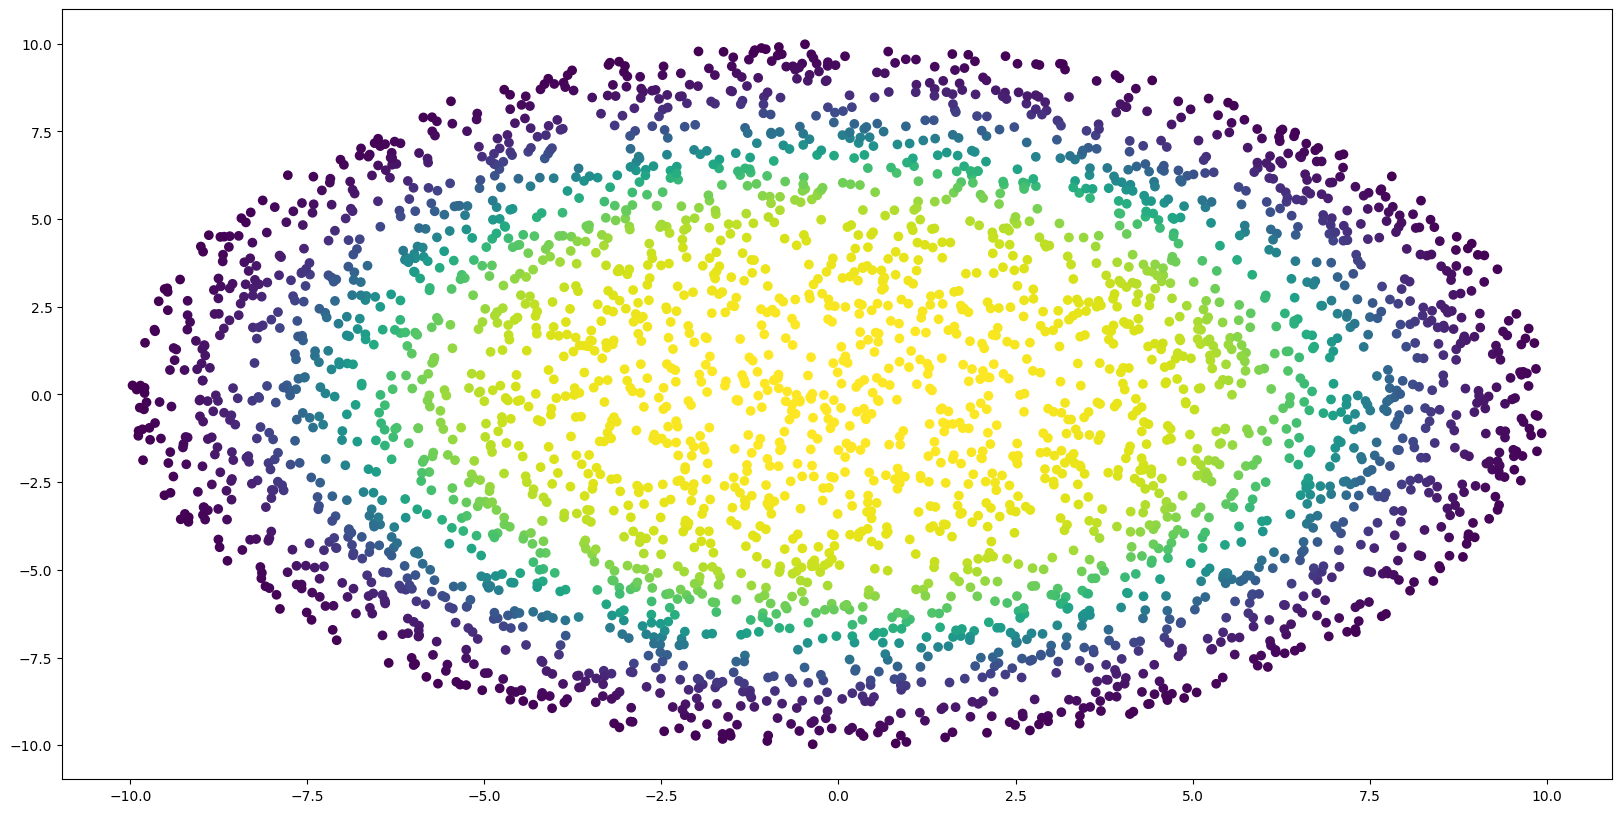

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df['x1'] ** 2 + df['x2'] ** 2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size=0.33)

logit_model.fit(X_train_new, y_train_new)
predict_logit = logit_model.predict(X_test_new)
predict_log_proba = logit_model.predict_proba(X_test_new)[:, 1]  # Вероятности для класса 1

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba)
plt.show()

Точность выше, чем было до feature engeneering. Видно четкое разделение классов.

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Точность нашей модели 0.8136363636363636


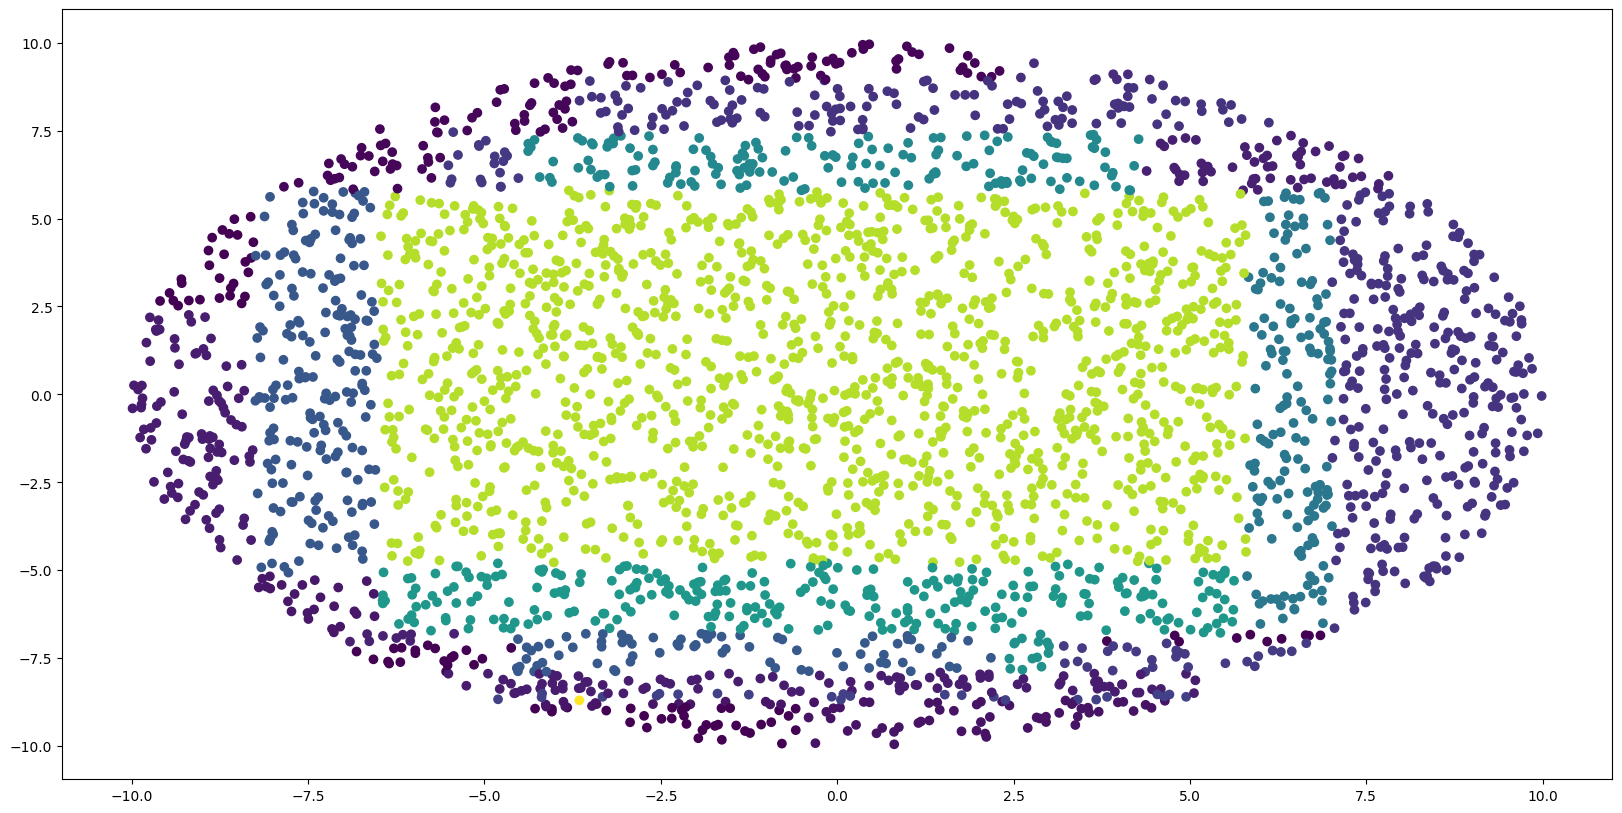

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код

tree_model = DecisionTreeClassifier(max_depth = 5)
tree_model.fit(X_train, y_train)

predict_tree = tree_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = tree_model.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ансамблирование может сгладить влияние шума, поскольку оно объединяет прогнозы нескольких моделей, уменьшая вероятность ошибки. Когда данные плохо разделимы, ансамблирование может объединить силу нескольких слабых моделей, чтобы лучше улавливать сложные закономерности. Decision Tree сами по себе склонны к переобучению. Ансамбли уменьшают эту проблему за счет усреднения или взвешивания прогнозов.



Точность нашей модели 0.84


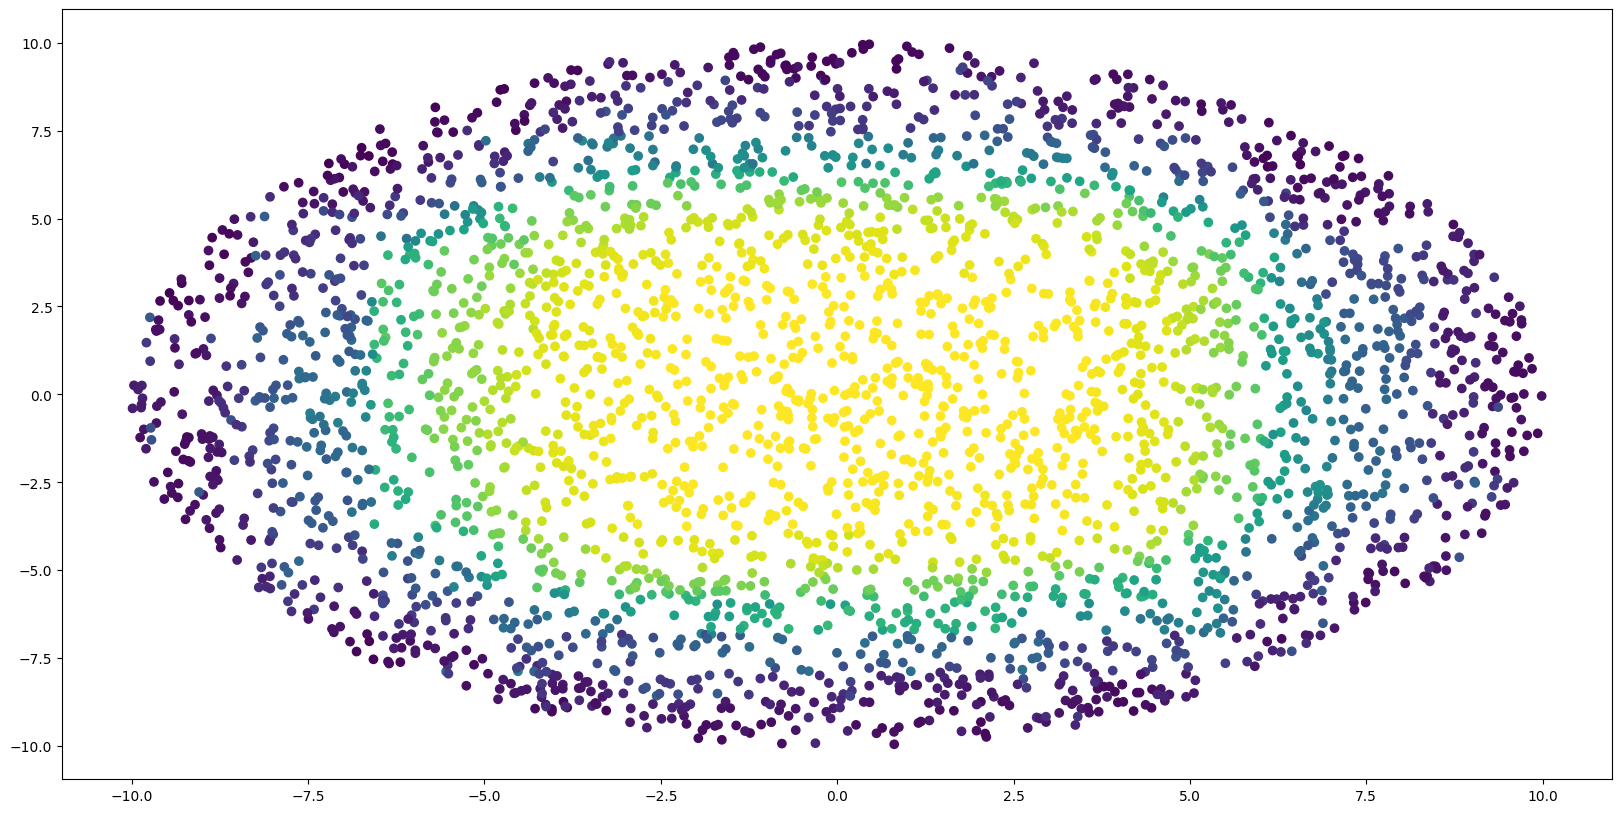

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

forest_model = RandomForestClassifier(n_estimators=150, max_depth=9)
forest_model.fit(X_train, y_train)

predict_forest = forest_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest_model.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_forest_proba)
plt.show()

Ансамбли уже лучше справились с обработкой. Метрика улучшилась.

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом.

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import torch.utils.data as data_utils
from torchmetrics import Accuracy

In [ ]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=64,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=64,
                                        shuffle=False)
    return train_loader, test_loader

train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # Первый слой - 2 входа, 10 выходов
        self.fc2 = nn.Linear(10, 1)  # Второй слой - 10 входов, 1 выход

    def forward(self, x):
        x = F.relu(self.fc1(x))     # активация после первого слоя
        x = torch.sigmoid(self.fc2(x))  # сигмоида на выходе для бинарной классификации
        return x


In [ ]:
model = NeuralNet() # Определяем нейронную сеть

In [ ]:
# your code here
accuracy_metric = Accuracy(task="binary")
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()  # Бинарная кросс-энтропия

In [ ]:
# Цикл обучения
for epoch in range(100):
    model.train()
    epoch_loss = 0.0
    accuracy_metric.reset()  # Сброс метрики перед каждой эпохой

    for inputs, labels in train_loader:
        inputs, labels = inputs, labels

        # Предсказания модели
        outputs = model(inputs).squeeze()

        # Вычисление функции потерь
        loss = loss_fn(outputs, labels.float())

        # Обновление весов модели
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Обновление метрики точности
        predictions = (outputs > 0.5).float()  # Преобразуем вероятности в метки 0/1
        accuracy_metric.update(predictions, labels)

        epoch_loss += loss.item()

    # Вычисление метрики точности для текущей эпохи
    epoch_accuracy = accuracy_metric.compute()

    print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

Epoch 1: Loss = 39.1982, Accuracy = 0.8328
Epoch 2: Loss = 38.9232, Accuracy = 0.8327
Epoch 3: Loss = 39.1998, Accuracy = 0.8310
Epoch 4: Loss = 38.8166, Accuracy = 0.8328
Epoch 5: Loss = 38.9297, Accuracy = 0.8315
Epoch 6: Loss = 38.6962, Accuracy = 0.8349
Epoch 7: Loss = 39.0840, Accuracy = 0.8334
Epoch 8: Loss = 38.9492, Accuracy = 0.8312
Epoch 9: Loss = 39.0976, Accuracy = 0.8281
Epoch 10: Loss = 39.0123, Accuracy = 0.8299
Epoch 11: Loss = 39.0917, Accuracy = 0.8309
Epoch 12: Loss = 38.7620, Accuracy = 0.8327
Epoch 13: Loss = 39.0355, Accuracy = 0.8306
Epoch 14: Loss = 38.8645, Accuracy = 0.8325
Epoch 15: Loss = 38.9259, Accuracy = 0.8313
Epoch 16: Loss = 38.8640, Accuracy = 0.8315
Epoch 17: Loss = 39.0115, Accuracy = 0.8304
Epoch 18: Loss = 39.2041, Accuracy = 0.8294
Epoch 19: Loss = 38.8054, Accuracy = 0.8336
Epoch 20: Loss = 38.9554, Accuracy = 0.8324
Epoch 21: Loss = 39.0161, Accuracy = 0.8321
Epoch 22: Loss = 38.9361, Accuracy = 0.8313
Epoch 23: Loss = 39.0994, Accuracy = 0.83

In [ ]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

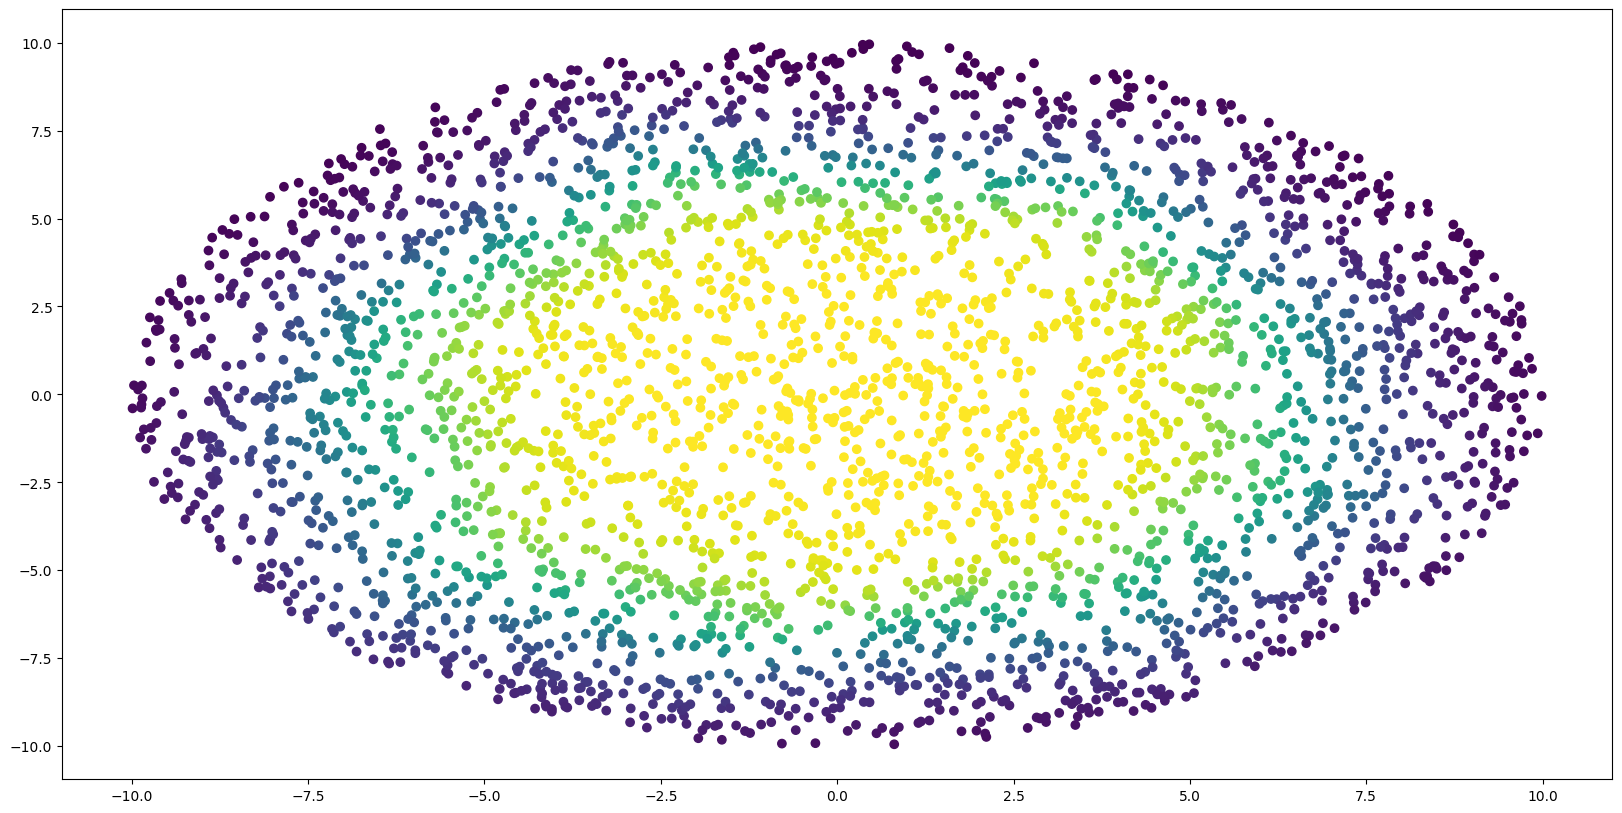

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()